In [1]:
import pandas as pd
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

In [63]:
# Weather Data
data = pd.read_csv('temp_data.csv', header=0)
data = data[data.Year == 2016]
data
#dt = datetime.datetime.strptime("2013-1-25", '%Y-%m-%d')
grouped_data = data.groupby(['Date']).mean()
temp_data = grouped_data['real_temp'].to_frame(name=None)
#temp_data = str(temp_data)
temp_data = temp_data.rename(columns={"real_temp":"Temp"})
#temp_data = temp_data.drop(['12/31/2016'])
#temp_data['Date'] = pd.to_datetime(temp_data['Date'], format='%m/%d/%Y')
temp_data
# Turnstile Data
df_turnstile= pd.read_csv("df_by_date.csv", low_memory=False)
df_t = df_turnstile.sort_values(by='Total_Traffic_Passengers', ascending=False)
df_t = df_t[df_t.Station == 'FULTON ST']
df_t = df_t.sort_values(by='Date')

In [64]:
temp_data
df_t.head()

,Station,Date,Total_Traffic_Passengers
74729,FULTON ST,01/02/2016,1.149374e+12
74730,FULTON ST,01/03/2016,4.432600e+04
74731,FULTON ST,01/04/2016,1.000014e+10
74732,FULTON ST,01/05/2016,1.000215e+10
74733,FULTON ST,01/06/2016,1.525220e+05


In [65]:
temp_data = temp_data.reset_index()
temp_data
temp_data['Date'] =  pd.to_datetime(temp_data['Date'], format='%Y/%m/%d')
temp_data.dtypes
df_t['Date'] =  pd.to_datetime(df_t['Date'], format='%m/%d/%Y')
#temp_data.head()


In [70]:
frames = [temp_data, df_t]

result = pd.merge(df_t,temp_data, on='Date', how='inner')
result.dropna()

,Station,Date,Total_Traffic_Passengers,Temp
0,FULTON ST,2016-01-02,1.149374e+12,34.558118
1,FULTON ST,2016-01-03,4.432600e+04,35.426000
2,FULTON ST,2016-01-04,1.000014e+10,29.777600
3,FULTON ST,2016-01-05,1.000215e+10,17.126706
4,FULTON ST,2016-01-06,1.525220e+05,24.378588
5,FULTON ST,2016-01-07,1.516330e+05,31.149500
6,FULTON ST,2016-01-08,1.475490e+05,35.184000
7,FULTON ST,2016-01-09,5.439300e+04,42.136348
8,FULTON ST,2016-01-10,3.643100e+04,52.452114
9,FULTON ST,2016-01-11,1.450310e+05,35.768429


In [82]:
y = result['Total_Traffic_Passengers'].values 
X = result['Temp'].values
X = X = np.reshape(X,(336, 1))

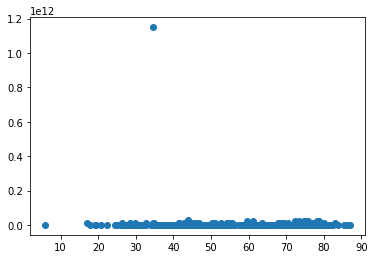

In [83]:
plt.scatter(X,y)

In [84]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [85]:
model.fit(X, y)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [86]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [-2.08185046e+08]
y-axis intercept:  16613497958.836525


In [87]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")
print(f"relative error: {(predictions[0]-y[0])/y[0]}")
predictions.shape

True output: 1149373858096.0
Predicted output: 9419014651.515572
Prediction Error: -1139954843444.4844
relative error: -0.9918050905846086


(336,)

In [88]:
pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y,"relative error":(predictions-y)/y})[["Predicted", "Actual", "Error","relative error"]]

,Predicted,Actual,Error,relative error
0,9.419015e+09,1.149374e+12,-1.139955e+12,-0.991805
1,9.238335e+09,4.432600e+04,9.238290e+09,208416.960657
2,1.041425e+10,1.000014e+10,4.141040e+08,0.041410
3,1.304797e+10,1.000215e+10,3.045827e+09,0.304517
4,1.153824e+10,1.525220e+05,1.153809e+10,75648.679712
5,1.012864e+10,1.516330e+05,1.012849e+10,66796.055210
6,9.288715e+09,1.475490e+05,9.288568e+09,62952.427710
7,7.841340e+09,5.439300e+04,7.841286e+09,144159.837868
8,5.693752e+09,3.643100e+04,5.693716e+09,156287.659126
9,9.167046e+09,1.450310e+05,9.166901e+09,63206.493682


In [89]:
x_min = X.min()
x_max = X.max()

In [90]:
y_min_actual = y.min()
y_max_actual = y.max()

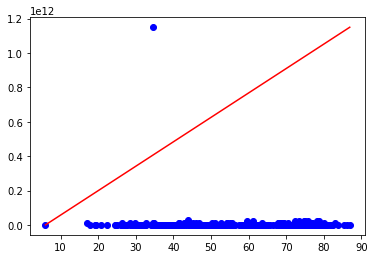

In [91]:
plt.scatter(X,y, c='blue')
plt.plot([x_min, x_max], [y_min_actual, y_max_actual], c='red')